In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as TF

In [2]:
from utils.data import SegmentationDataset

## Exploring how to perform augmentation on point mask

In [3]:
dataset = SegmentationDataset('data_glas_0005/train/')

Segmentation dataset (training) initialized with 76 images.
Supervision mode: point-level


In [4]:
img, segments, adjacency, mask, point_mask = dataset[0]

In [5]:
point_mask

tensor([[[0, 0],
         [0, 0],
         [0, 0],
         ...,
         [0, 0],
         [0, 0],
         [0, 0]],

        [[0, 0],
         [0, 0],
         [0, 0],
         ...,
         [0, 0],
         [0, 0],
         [0, 0]],

        [[0, 0],
         [0, 0],
         [0, 0],
         ...,
         [0, 0],
         [0, 0],
         [0, 0]],

        ...,

        [[0, 0],
         [0, 0],
         [0, 0],
         ...,
         [0, 0],
         [0, 0],
         [0, 0]],

        [[0, 0],
         [0, 0],
         [0, 0],
         ...,
         [0, 0],
         [0, 0],
         [0, 0]],

        [[0, 0],
         [0, 0],
         [0, 0],
         ...,
         [0, 0],
         [0, 0],
         [0, 0]]])

In [6]:
point_mask.sum()

tensor(0)

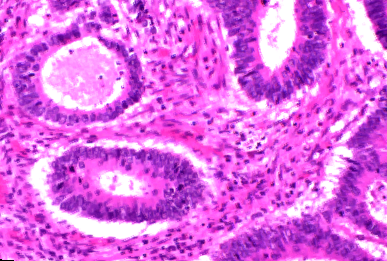

In [7]:
TF.to_pil_image(img)

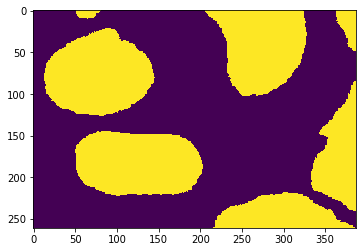

In [9]:
mask = np.array(mask)
plt.imshow(mask[..., 1])

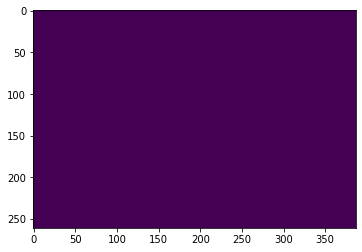

In [11]:
point_mask = np.array(point_mask)
plt.imshow(point_mask[..., 1])

In [12]:
np.unique(point_mask)

array([0])

In [13]:
point_mask.sum()

0